In [43]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

In [44]:
# Rows: observations, Columns: predictors
from data_import_initial_analysis import build_X, column_names
import pandas as pd
FD001 = pd.read_csv('data/train_FD001.txt', sep=r'\s+', header=None, names=column_names)
FD002 = pd.read_csv('data/train_FD002.txt', sep=r'\s+', header=None, names=column_names)
FD003 = pd.read_csv('data/train_FD003.txt', sep=r'\s+', header=None, names=column_names)
FD004 = pd.read_csv('data/train_FD004.txt', sep=r'\s+', header=None, names=column_names)

X1, feature_cols1 = build_X(FD001, drop_constant=True, drop_op_setting=True)
X2, feature_cols2 = build_X(FD002, drop_constant=True, drop_op_setting=True)
X3, feature_cols3 = build_X(FD003, drop_constant=True, drop_op_setting=True)
X4, feature_cols4 = build_X(FD004, drop_constant=True, drop_op_setting=True)

In [45]:
def standardize(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0, ddof=1)
    return (X - means) / stds

standardized_X1 = standardize(X1)
standardized_X2 = standardize(X2)
standardized_X3 = standardize(X3)
standardized_X4 = standardize(X4)

covariance_matrix_1 = np.cov(standardized_X1, rowvar=False)
covariance_matrix_2 = np.cov(standardized_X2, rowvar=False)
covariance_matrix_3 = np.cov(standardized_X3, rowvar=False)
covariance_matrix_4 = np.cov(standardized_X4, rowvar=False)


In [46]:
eigenvalues_1, eigenvectors_1 = np.linalg.eigh(covariance_matrix_1)
eigenvalues_1 = eigenvalues_1[::-1]
eigenvectors_1 = eigenvectors_1[:, ::-1]

eigenvalues_2, eigenvectors_2 = np.linalg.eigh(covariance_matrix_2)
eigenvalues_2 = eigenvalues_2[::-1]
eigenvectors_2 = eigenvectors_2[:, ::-1]

eigenvalues_3, eigenvectors_3 = np.linalg.eigh(covariance_matrix_3)
eigenvalues_3 = eigenvalues_3[::-1]
eigenvectors_3 = eigenvectors_3[:, ::-1]

eigenvalues_4, eigenvectors_4 = np.linalg.eigh(covariance_matrix_4)
eigenvalues_4 = eigenvalues_4[::-1]
eigenvectors_4 = eigenvectors_4[:, ::-1]

print("Eigenvalues of FD001:\n", eigenvalues_1)
print("\nEigenvalues of FD002:\n", eigenvalues_2)
print("\nEigenvalues of FD003:\n", eigenvalues_3)
print("\nEigenvalues of FD004:\n", eigenvalues_4)

Eigenvalues of FD001:
 [9.0264  2.09854 0.96643 0.41393 0.36828 0.34832 0.30611 0.28979 0.25541
 0.20619 0.19602 0.17658 0.17255 0.14619 0.02927]

Eigenvalues of FD002:
 [16.89124  3.57572  0.38508  0.07708  0.03612  0.02041  0.00828  0.00218
  0.00132  0.00107  0.00097  0.00019  0.00014  0.0001   0.00005  0.00003
  0.00001  0.       0.       0.       0.     ]

Eigenvalues of FD003:
 [7.44788 4.74645 0.92849 0.78146 0.43176 0.33904 0.30655 0.24931 0.20074
 0.16049 0.13776 0.12515 0.06108 0.03696 0.0359  0.01098]

Eigenvalues of FD004:
 [16.8915   3.57557  0.40372  0.0618   0.03569  0.01542  0.0086   0.0032
  0.00154  0.00123  0.00103  0.00029  0.00018  0.0001   0.00009  0.00005
  0.00001  0.       0.       0.       0.     ]


0.7416625272338468
0.974617362667686
0.7621457745289549
0.9746219743534354


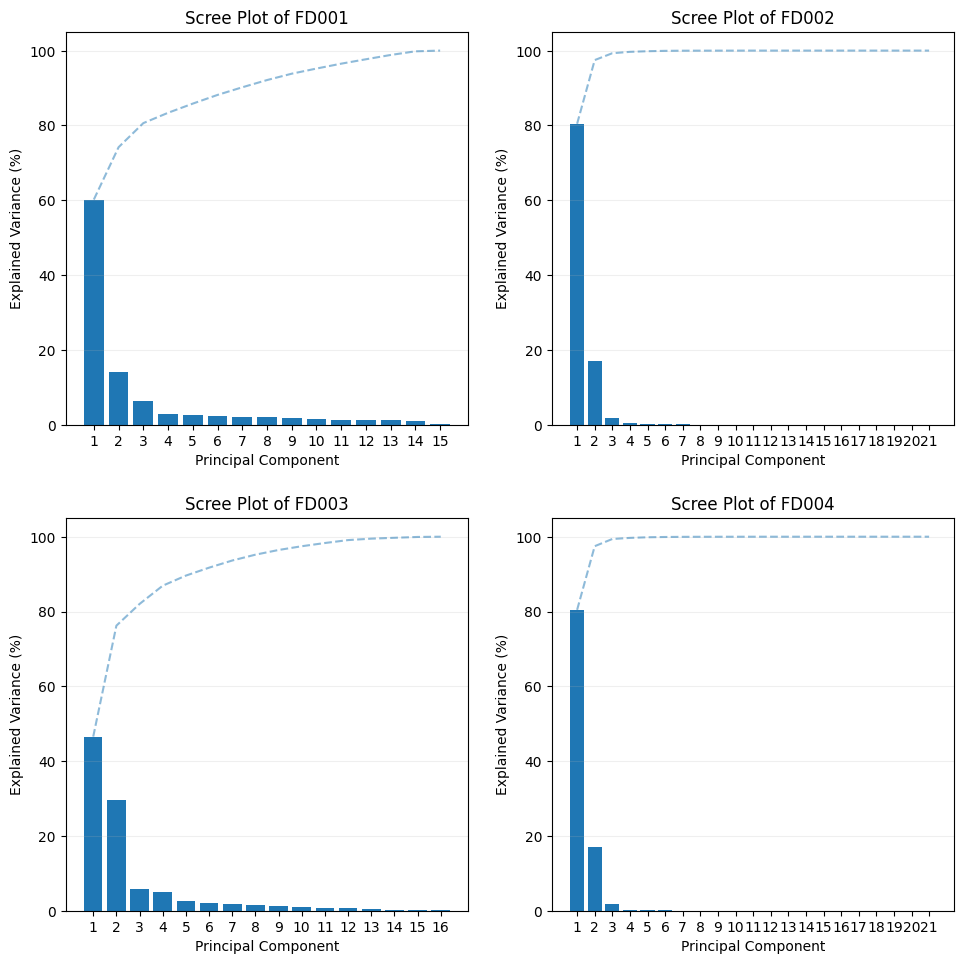

In [47]:
def plot_scree_plots(eigenvalues, ax, i, j, title='Scree Plot'):
    explained_var = eigenvalues / eigenvalues.sum()
    cumulative_var = np.cumsum(explained_var)

    ax[i, j].bar(range(1, len(explained_var)+1), explained_var*100)
    ax[i, j].plot(range(1, len(cumulative_var)+1), cumulative_var*100, alpha=0.5, linestyle='--')
    ax[i, j].set_xlabel('Principal Component')
    ax[i, j].set_ylabel('Explained Variance (%)')
    ax[i, j].set_title(title)
    
    ax[i, j].set_xticks(range(1, len(explained_var)+1))
    ax[i, j].set_xticklabels([str(k) for k in range(1, len(explained_var)+1)])
    ax[i, j].grid(axis='y', alpha=0.2)
    
    print(cumulative_var[1])


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plot_scree_plots(eigenvalues_1, ax, 0, 0, title='Scree Plot of FD001')
plot_scree_plots(eigenvalues_2, ax, 0, 1, title='Scree Plot of FD002')
plot_scree_plots(eigenvalues_3, ax, 1, 0, title='Scree Plot of FD003')
plot_scree_plots(eigenvalues_4, ax, 1, 1, title='Scree Plot of FD004')


fig.tight_layout(pad=2.0)
plt.show()

<Figure size 640x480 with 0 Axes>

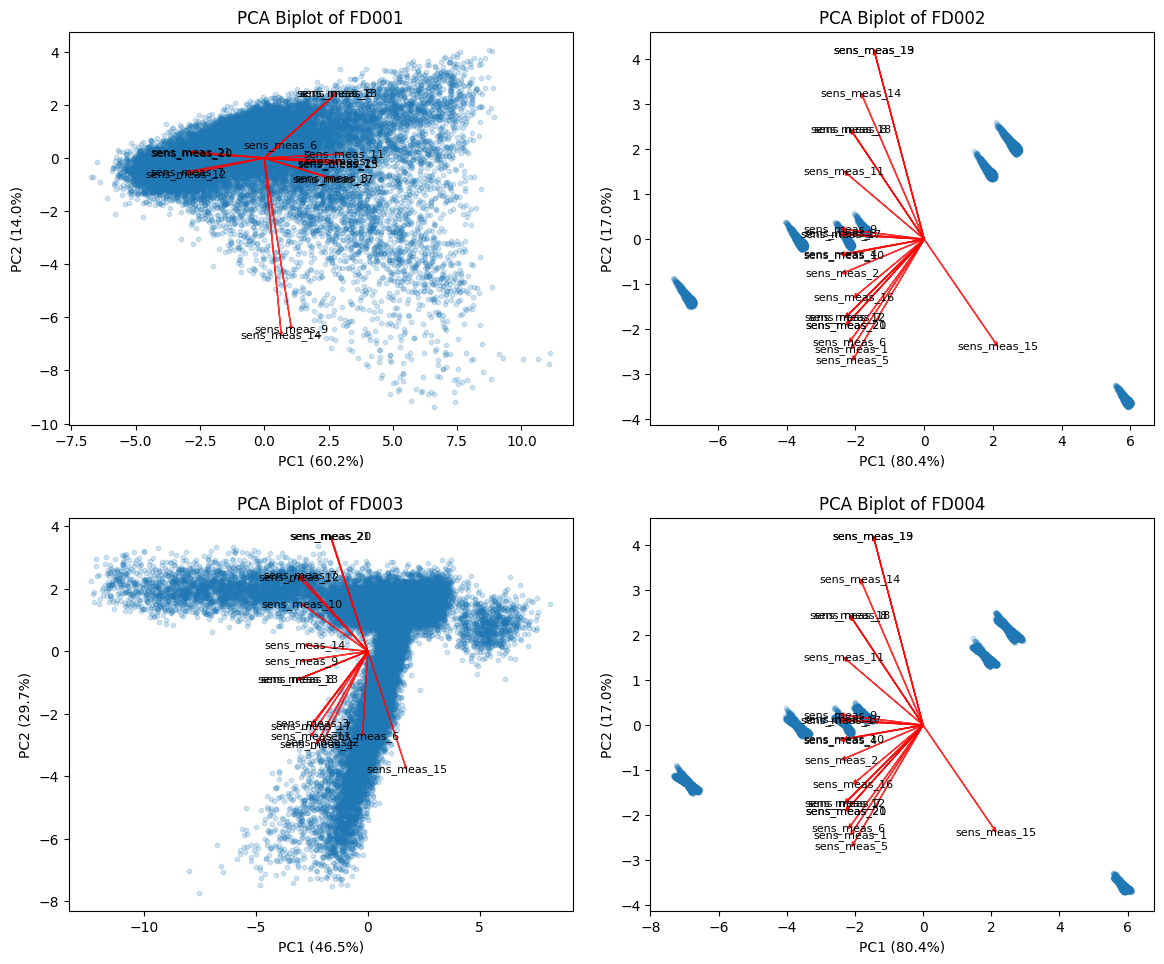

In [ ]:
def plot_biplot(standardized_X, eigenvectors, eigenvalues, ax, i, j, title='PCA Biplot with loadings'):
    scores = np.dot(standardized_X, eigenvectors)
    n_vars = eigenvectors.shape[0]
    
    x = eigenvectors[:,0]*10
    y = eigenvectors[:,1]*10

    ax[i, j].scatter(scores[:,0], scores[:,1], alpha=0.2, s=10)
    
    for k in range(n_vars):
        ax[i, j].arrow(0, 0, x[k], y[k], color='red', alpha=0.8, head_width=0.1, head_length=0.1, length_includes_head=True)
        ax[i, j].text(x[k], y[k], 
                  (feature_cols1[k] if (i == 0 and j == 0) else
                   feature_cols2[k] if (i == 0 and j == 1) else
                   feature_cols3[k] if (i == 1 and j == 0) else
                   feature_cols4[k]),
                  fontsize=8, ha='center', va='center')

    ax[i, j].set_xlabel(f"PC1 ({eigenvalues[0]/eigenvalues.sum()*100:.1f}%)")
    ax[i, j].set_ylabel(f"PC2 ({eigenvalues[1]/eigenvalues.sum()*100:.1f}%)")
    ax[i, j].set_title(title)

fig = plt.figure()
fig, ax_arr = plt.subplots(2, 2, figsize=(12, 10))

plot_biplot(standardized_X1, eigenvectors_1, eigenvalues_1, ax_arr, 0, 0, title='PCA Biplot of FD001')
plot_biplot(standardized_X2, eigenvectors_2, eigenvalues_2, ax_arr, 0, 1, title='PCA Biplot of FD002')
plot_biplot(standardized_X3, eigenvectors_3, eigenvalues_3, ax_arr, 1, 0, title='PCA Biplot of FD003')
plot_biplot(standardized_X4, eigenvectors_4, eigenvalues_4, ax_arr, 1, 1, title='PCA Biplot of FD004')


fig.tight_layout(pad=2.0)
plt.show()

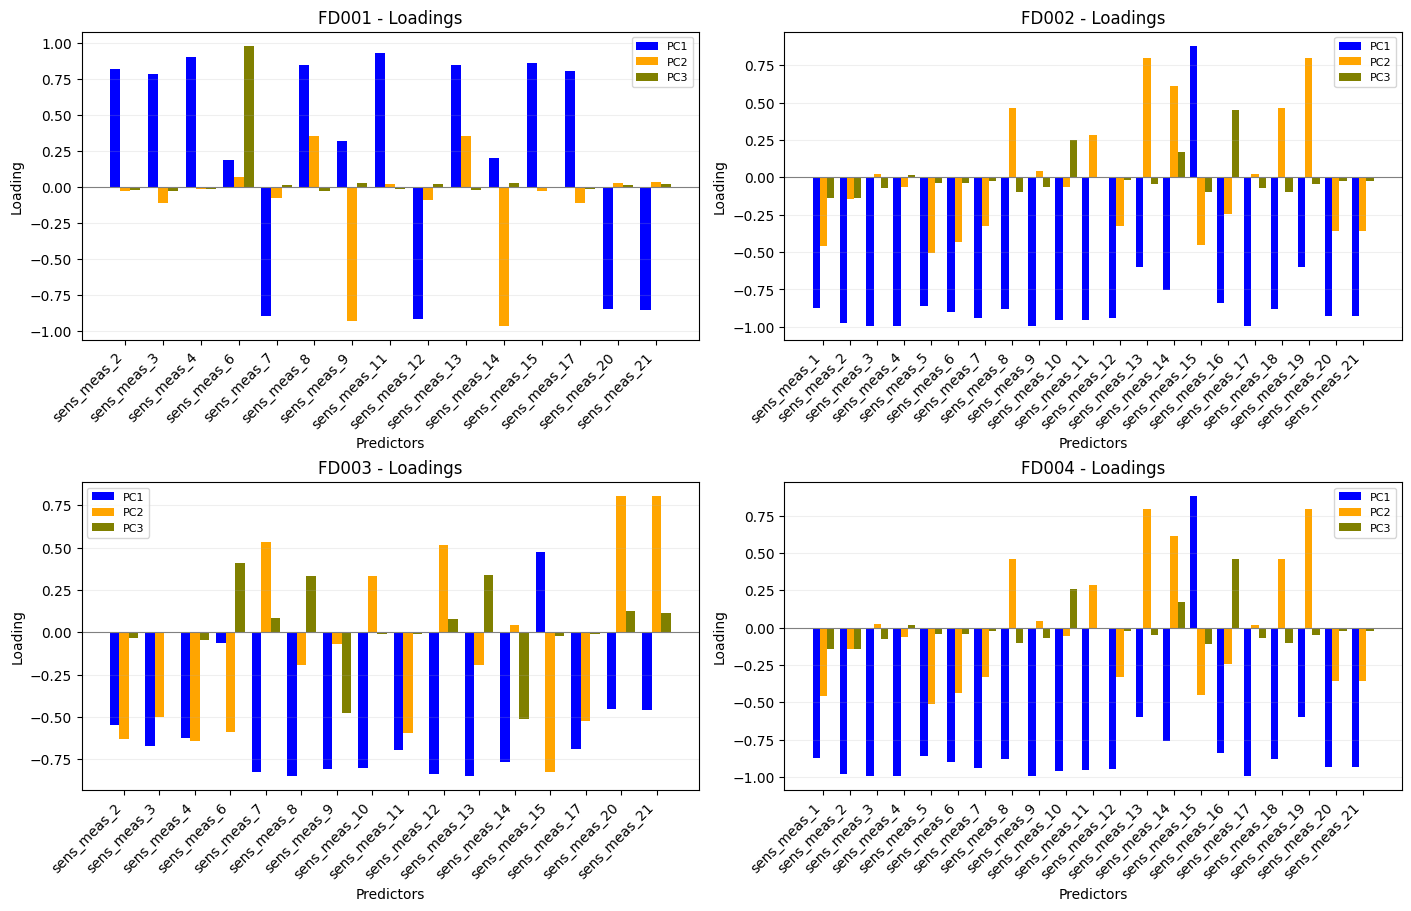

In [ ]:
def plot_loadings_bars(eigenvectors, eigenvalues, feature_labels, ax, pcs=(0,1,2), title='PCA Loadings'):
    pcs = [p for p in pcs if p < eigenvectors.shape[1]]
    if not pcs:
        return
    L = np.column_stack([eigenvectors[:, p] * np.sqrt(eigenvalues[p]) for p in pcs])  # correlazioni var–PC
    n, k = L.shape

    if len(feature_labels) != n:
        feature_labels = [f"S{i+1}" for i in range(n)]

    x = np.arange(n)
    width = 0.8 / k
    colors = ['blue', 'orange', 'olive', 'red', 'purple'][:k]

    for i, p in enumerate(pcs):
        ax.bar(x + (i - (k-1)/2)*width, L[:, i], width=width, color=colors[i], label=f'PC{p+1}')

    ax.axhline(0, color='gray', lw=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(feature_labels, rotation=45, ha='right')
    ax.set_ylabel('Loading')
    ax.set_xlabel('Predictors')
    ax.set_title(title)
    ax.grid(axis='y', alpha=0.2)
    ax.legend(frameon=True, fontsize=8)

fig, axs = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)
plot_loadings_bars(eigenvectors_1, eigenvalues_1, feature_cols1, axs[0,0], title='FD001 - Loadings')
plot_loadings_bars(eigenvectors_2, eigenvalues_2, feature_cols2, axs[0,1], title='FD002 - Loadings')
plot_loadings_bars(eigenvectors_3, eigenvalues_3, feature_cols3, axs[1,0], title='FD003 - Loadings')
plot_loadings_bars(eigenvectors_4, eigenvalues_4, feature_cols4, axs[1,1], title='FD004 - Loadings')
plt.show()